# Read csv file from Google Drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load customers' review file, generate it into a Feedback file

In [37]:
import csv
feedbacks = []
counter = 0
with open('/content/drive/MyDrive/Colab Notebooks/Feedback.csv', mode='r', encoding='utf8') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        counter+=1
        if (counter <= 9):
            feedbacks.append(row['Title'] + '.')

# Use Azure Text Analytics function to analyze customers' reviews

In [38]:
pip install azure.ai.textanalytics

# Providing Key and endPoint to access the Azure text analytics service

In [39]:
key = "23d7a167c2694d3ca8db63fbea7a4f7c"
endPoint = "https://cognitiveservices-qli.cognitiveservices.azure.com/"

#Identify and analyze customers' reviews

In [40]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

client = TextAnalyticsClient(endpoint=endPoint, credential=AzureKeyCredential(key))
response = client.analyze_sentiment(documents=feedbacks)
review = type('', (), {'positive':0, 'negative':0, 'neutral':0})()
for idx, sentence in enumerate(response):
    print("Sentence {}: {}".format(idx+1, sentence.sentiment))
    if(sentence.sentiment == "positive"):
        review.positive = review.positive + 1
    elif (sentence.sentiment == "negative"):
        review.negative = review.negative + 1
    else:
        review.neutral = review.neutral + 1

Sentence 1: neutral
Sentence 2: neutral
Sentence 3: negative
Sentence 4: positive
Sentence 5: positive
Sentence 6: negative
Sentence 7: positive
Sentence 8: neutral
Sentence 9: positive


# Show the result of different attitudes

<BarContainer object of 3 artists>

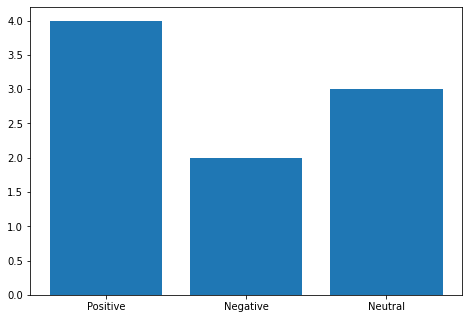

In [41]:
import matplotlib.pyplot as plot
figure = plot.figure()
ax = figure.add_axes([0,0,1,1])
x_values = ['Positive', 'Negative', 'Neutral']
y_values = [review.positive, review.negative, review.neutral]
ax.bar(x_values, y_values)